<a href="https://colab.research.google.com/github/sbnnm1972-design/Deep_learning-practicals/blob/main/prac_1_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

x = [np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y = np.eye(3)
print(x,"\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

def softmax(z):
  z= z -np.max(z, axis=1, keepdims=True)
  exp_z = np.exp(z)
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)
def for_pass (x,w1,w2):


  z1 = np.dot(x,w1)
  a1 = sigmoid(z1)
  z2 = np.dot(a1,w2)
  a2 = softmax(z2)
  return (a2)

def gen_weight(x,y):
  li = []
  for i in range(x*y):
    li.append(np.random.randn())
  print(np.array(li).reshape(x,y))
  return (np.array(li).reshape(x,y))

def loss(op , Y):
  loss = np.square(op - Y)
  loss = np.sum(loss)/len(Y)
  return (loss)
def cross_e_loss(op,Y):
  return-np.sum(y * np.log(op + 1e-9))


def back_prop(x,y,w1,w2,alpha):

  x = x.reshape(1,-1)
  y = y.reshape(1,-1)

  z1 = np.dot(x,w1)
  a1 = sigmoid(z1)
  z2 = np.dot(a1,w2)
  a2 = softmax(z2)

  d2 = (a2 - y)
  d1 = (d2 @ w2.T) * a1 * (1 - a1)


  w1_adj = np.dot(x.T,d1)
  w2_adj = np.dot(a1.T,d2)

  w1 = w1 - (alpha*w1_adj)
  w2 = w2 - (alpha*w2_adj)

  return (w1,w2)


In [ ]:
w1 = gen_weight(30,5)
w2 = gen_weight(5,3)
print(  w1,"\n",w2)

[[ 0.24438749  0.77620215 -0.49424228  1.09894711 -0.89841999]
 [ 0.6335348  -0.94265073 -0.13871765 -1.6084171  -0.35444046]
 [ 1.45837042 -0.27325685  0.04067862 -0.21591143  0.86608917]
 [-0.54922495  1.62671701 -0.81866169  1.43107372 -0.15906051]
 [ 0.09505496 -1.32850094 -0.29626223 -0.40265427  0.31311272]
 [ 0.71885835  0.77485097 -1.93270295 -0.26186017 -2.53054024]
 [ 0.9092142  -1.44292382  1.46195507 -0.25964482  0.52698251]
 [-0.50994364 -0.35189972  2.03095582  0.01575524  0.49914767]
 [ 0.53757031 -0.62953631  0.34200982 -1.07147975 -0.94154867]
 [ 0.49917939  0.52185755  0.99338939  1.44042217  1.32740007]
 [-0.76517618 -0.10549349  0.10683562 -0.59697184  0.1130325 ]
 [-0.78660075 -2.35735485  0.19633614 -0.32820566  0.80839752]
 [-1.46194671 -0.09347276  1.0708794   2.40417599  0.62546753]
 [ 0.03528014  0.19401689 -0.25077468 -0.97799853  0.15666297]
 [ 0.56294837 -1.55934545  0.05211832  0.34005794 -1.03427496]
 [-0.3181388  -2.82329187  0.41454562 -1.72112349 -1.72

In [ ]:
def train_nn(x,Y,w1,w2,alpha = 0.01,epochs = 100):
  score = []
  loss_m = []
  for i in range(epochs):
    correct=0
    l= 0
    for j in range(len(x)):
      output = for_pass(x[j],w1,w2)
      l +=  (cross_e_loss(output,Y[j]))
      pred = np.argmax(output)
      true = np.argmax(Y[j])
      if pred == true:
        correct += 1

      w1 , w2 = back_prop(x[j],Y[j],w1,w2,alpha)

      accuracy = correct / len(x)
      loss = l / len(x)
      score.append(accuracy)
      loss_m.append(loss)
    if i%10 == 0:
      print(f"epoche:{i+1} | loss: {loss:.4f} | acc: {accuracy*100:.2f}%")
  return (score, loss_m , w1,w2)

epoche:1 | loss: 3.5041 | acc: 100.00%
epoche:11 | loss: 3.5118 | acc: 100.00%
epoche:21 | loss: 3.5195 | acc: 100.00%
epoche:31 | loss: 3.5272 | acc: 100.00%
epoche:41 | loss: 3.5351 | acc: 100.00%
epoche:51 | loss: 3.5431 | acc: 100.00%
epoche:61 | loss: 3.5514 | acc: 100.00%
epoche:71 | loss: 3.5600 | acc: 100.00%
epoche:81 | loss: 3.5690 | acc: 100.00%
epoche:91 | loss: 3.5786 | acc: 100.00%


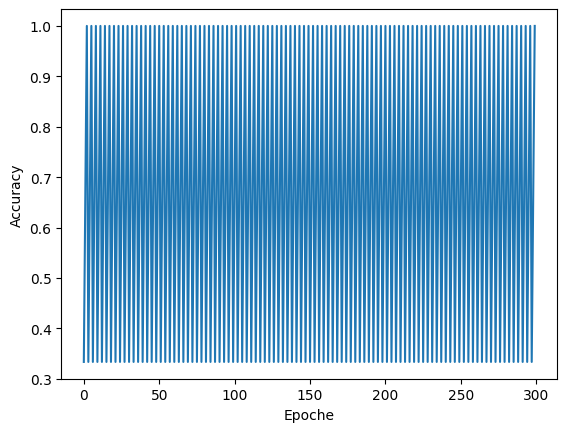

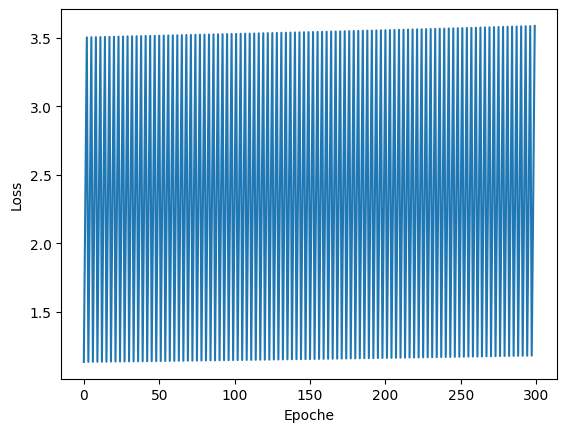

In [ ]:

accuracy, loss_m , w1,w2 = train_nn(x,y,w1,w2)

import matplotlib.pyplot as plt

plt.plot(accuracy)
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

plt.plot(loss_m)
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.show()

image is A


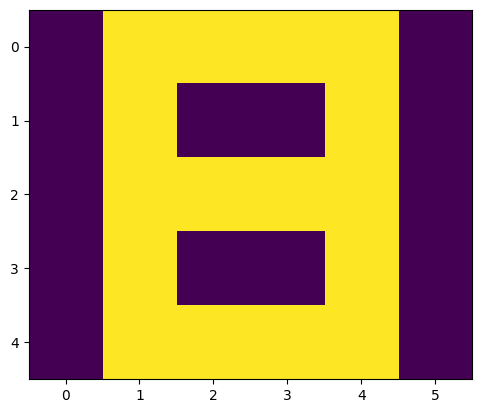

image is B


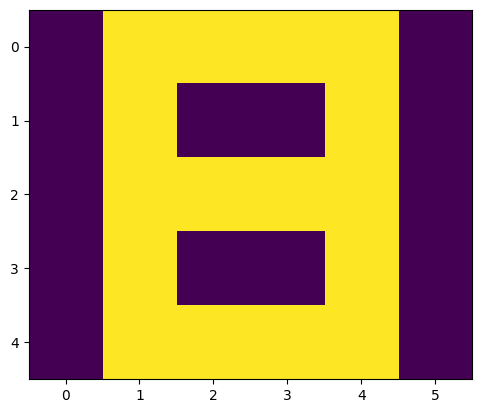

image is B


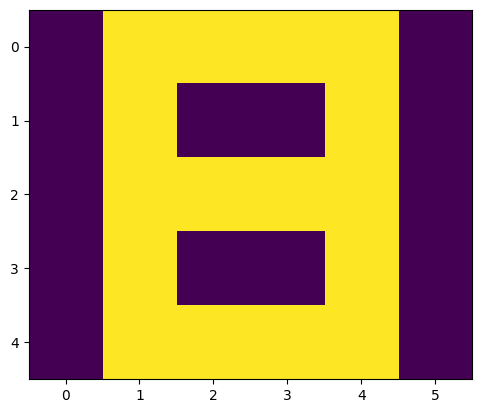

In [ ]:
def pred(x,w1,w2):
  out = for_pass(x ,w1,w2)
  maxm=0
  k=0
  for i in range(len(out[0])):
    if (out[0][i] > maxm):
      maxm = out[0][i]
      k= i
    if (k==0):
      print("image is A")
    elif(k == 1):
      print("image is B")
    else:
      print("image is C")
    plt.imshow(x.reshape(5,6))
    plt.show()

pred(x[1], w1, w2)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
class neuralnet(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = neuralnet().to(device)
print(model)

neuralnet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1,28,28,device = device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")





Predicted class: tensor([5])
